In [1]:
import os
import ast
import torch
from Data import *
import pandas as pd
from helper import *
import torch.nn as nn
from BasicsModels import *
from TaxonomyModel import *
from transformers import AutoTokenizer

/home/nogaschw/.conda/envs/env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def get_df(path):
    df = pd.read_csv(path)
    print(f"finish the read {len(df)}")
    df['prev_code'] = df['prev_code'].apply(ast.literal_eval)
    df['prev_question'] = df['prev_question'].apply(ast.literal_eval)
    df['score'] = df['score'].apply(ast.literal_eval)
    print(f'Create df...')
    return df

In [ ]:
path = "/home/nogaschw/Codeworkout/df_taxonomy_falcon.csv"
df_falcon = get_df(path)
df_falcon['struggling'].value_counts()

In [4]:
path = "/home/nogaschw/Codeworkout/py&javaTax.csv"
df_codeworkout = get_df(path)
df_codeworkout['struggling'].value_counts()

finish the read 15766
Create df...


struggling
0    14633
1     1133
Name: count, dtype: int64

In [5]:
text_model_name = 'google-bert/bert-base-uncased'
code_model_name = 'microsoft/codebert-base'

text_tokenizer = AutoTokenizer.from_pretrained(text_model_name)
code_tokenizer = AutoTokenizer.from_pretrained(code_model_name)
if text_tokenizer.pad_token is None:
    text_tokenizer.pad_token = text_tokenizer.eos_token
if code_tokenizer.pad_token is None:
    code_tokenizer.pad_token = code_tokenizer.eos_token

In [6]:
df_results = pd.DataFrame(columns=['model_name', 'threshold', 'roc_auc', 'accuracy', 'precision', 'recall', 'f1'])

In [98]:
hidden_size = 128
num_layers = 2
lr = 0.00001
all_questions = 0
taxonomy = 0
balance_def = 0

balance_def = [oversampling_boosting, oversampling_df, undersampling_df, oversampling_augmentation][balance_def]

name = f'{"All_History_with"}_{["Current_Question", "All_Question"][all_questions]}_{hidden_size}_{num_layers}_{lr}_{balance_def.__name__}'

dataset = [DatasetCodeQuestion, DatasetCodeQPrevQ][all_questions]

model = [CodeQuestionLSTMModel(text_model_name, code_model_name, hidden_size, num_layers),
        CodeQPrevQLSTMModel(text_model_name, code_model_name, hidden_size, num_layers)][all_questions]
feature = None

if taxonomy:
    dataset = FeatureDataset
    # feature =['If/Else', 'NestedIf', 'While', 'For', 'NestedFor', 'Math+-*/', 'Math%', 'LogicAndNotOr', 'LogicCompareNum', 'LogicBoolean', 'StringFormat', 'StringConcat', 'StringIndex', 'StringLen', 'StringEqual', 'CharEqual', 'ArrayIndex', 'DefFunction']
    # feature = ['LogicBoolean','StringLen', 'StringEqual', 'CharEqual', 'ArrayIndex', 'DefFunction', 'IfKnowledge', 'StringKnowledge', 'LoopsKnowledge', 'Math+-*/%', 'LogicOperators']
    feature = ['IfElse', 'Loops', 'MathOperations', 'LogicOperators', 'StringOperations', 'List', 'FileOperations', 'Functions', 'Dictionary', 'Tuple']
    model = ModelComputationalConstructs(model, hidden_size, len(feature))
    name = f'Taxonomycodeworkout_{["Current_Question", "All_Question"][all_questions]}_{hidden_size}_{num_layers}_{lr}_{balance_def.__name__}'

use microsoft/codebert-base


A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

use microsoft/codebert-base


A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

In [99]:
train_dataloader, valid_dataloader, test_dataloader = create_data_loader(df_codeworkout, dataset, text_tokenizer, code_tokenizer, batch_size=1, balanced_def=balance_def, feature=feature, ids_filepath_prefix="/home/nogaschw/Codeworkout/Thesis/Data/codeworkout/split_ids")

Load exist spliting


In [100]:
train_dataloader.dataset.df["struggling"].value_counts()

struggling
0    20213
1     6322
Name: count, dtype: int64

In [91]:
device_name = "cuda" if torch.cuda.is_available() else "cpu"
device = torch.device(device_name)

In [79]:
path_models = "/home/nogaschw/Codeworkout/Thesis/Models"
files = os.listdir(path_models)
display(files)


['Taxonomycodeworkout_All_Question_128_2_1e-05_oversampling_df.pth',
 'Taxonomycodeworkout_All_Question_128_2_1e-05_oversampling_boosting.pth',
 'Taxonomycodeworkout_All_Question_128_2_1e-05_oversampling_augmentation.pth',
 'All_History_with_Current_Question_128_2_1e-05_oversampling_augmentation.pth',
 'Taxonomycodeworkout_Current_Question_128_2_1e-05_oversampling_augmentation.pth',
 'All_History_with_Current_Question_128_2_1e-05_oversampling_boosting.pth',
 'All_History_with_All_Question_128_2_1e-05_oversampling_boosting.pth',
 'All_History_with_All_Question_128_2_1e-05_oversampling_augmentation.pth',
 'Mean_All_History_with_All_Question_128_2_1e-05_oversampling_boosting.pth',
 'All_History_with_All_Question_128_3_1e-05_oversampling_augmentation.pth',
 'TaxonomyAllcodeworkout_All_Question_128_2_1e-05_oversampling_boosting.pth',
 'TaxonomyAllcodeworkout_All_Question_128_2_1e-05_oversampling_augmentation.pth']

In [101]:
model_path_name = os.path.join(path_models, f"{name}.pth")
print(model_path_name)
model.load_state_dict(torch.load(model_path_name))
model.to(device)

/home/nogaschw/Codeworkout/Thesis/Models/All_History_with_Current_Question_128_2_1e-05_oversampling_boosting.pth


/tmp/ipykernel_4132079/3871524362.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path_name))


CodeQuestionLSTMModel(
  (code_model): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerN

In [ ]:
all_labels, all_probs = eval_loop(model, valid_dataloader, device)

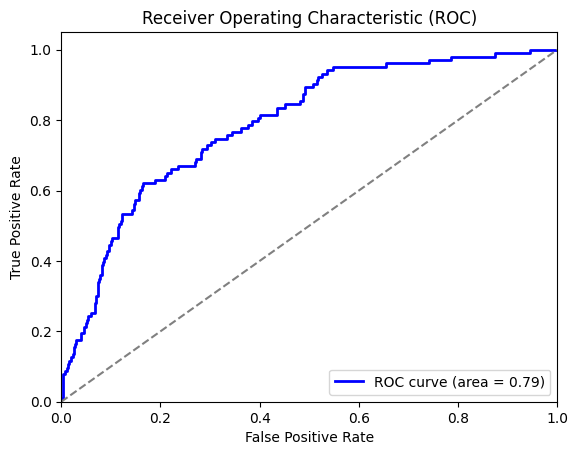

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(all_labels, all_probs)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [103]:
all_labels, all_probs = eval_loop(model, test_dataloader, device)

Batch 0 from 3107


Batch 1000 from 3107
Batch 2000 from 3107
Batch 3000 from 3107


In [105]:
name

'All_History_with_Current_Question_128_2_1e-05_oversampling_boosting'

In [107]:
results(df_results, name, 0.5, all_labels, all_probs)   

/sise/home/nogaschw/Codeworkout/Thesis/helper.py:106: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.DataFrame([[model_name, threshold, roc_auc, accuracy, precision, recall, f1]], columns=df.columns), df], ignore_index=True)


,model_name,threshold,roc_auc,accuracy,precision,recall,f1
0,All_History_with_Current_Question_128_2_1e-05_...,0.5,0.751571,0.887351,0.265018,0.345622,0.3


In [83]:
train_dataloader.dataset.df['struggling'].value_counts()

struggling
0    10377
1     2594
Name: count, dtype: int64

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(all_labels, np.round(all_probs))
cm


array([[2590,  300],
       [ 110,  107]])